# ASTR3110 Tutorial 1: Probabilities and Statistics

Tutorial 1 of the *'Data Science Techniques in Astrophysics'* course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand what is meant by discrete and continuous probability
 * Learn how to manipulate probabilities of events
 * Know the moments used to characterise probability distributions
 * Undertand the properties of the most comon distributions
 * Apply your knowledge to toy dataset

## Introduction

The most profound discoveries in modern observational astrophysics come from large surveys, often taking a data-fusion approach. When dealing with these large datasets, probabilities and statistics are required to:

 * Detect signals in noisy data
 * Find and investigate correlations and structure in data
 * Test a theory or hypothesis
 * Fit models to data and estimate parameters
 * Distinguish between competing models
 
Unlike many other data-intensive fields, astronomical data is fixed - we cannot re-run our experiments (e.g., forming starts, merging galaxies, supernova) and often only have single observations to rely on. Instead we have to assume that observations of different objects constitute a reasonable sample, and we can draw reasonable conclusions from a statistical analysis.

## Probability

There are two philosophies that explain probability:

 * **Frequentist:** Probabilities are measurable frequencies assigned to specific events, i.e., events are likely to re-occur on a certain cadence.
 
 * **Bayesian:** Probability is a 'degree of belief' in the outcome of an event, allocated by an observer based on the available evidence (including prior belief).
 
In this tutorial we will be covering the *frequentist* philosophy and moving on to the (more powerful) Bayesian methods later in the course.

### Maths and notation of probabilities

A *discrete* probability can be assigned to an individual event $i$ so that $P_i$ is the probability of the $i^{th}$ event occuring. A *continuous* probability $P(x)$ is the probability that random variable $x$ occurs in a process. Probabilities obey mathematical rules:

 1. **Range of Probabilities:** The probability of an event or variable occuring is a real number between zero and one.
 
 $0 \leq P(x) \leq 1$
 
 
 2. **Sum Rule:** Discrete probabilities sum to one.
 
 $\sum_i P_i = 1$.
 
 For a random variable $x$ that can take any value on a continuous range, the sum becomes an integral
 
 $\int_{-\infty}^{+\infty} dx ~ p(x) = 1$,
 
 where $p(x)$ is the probability density function (units of $1/x$).
 
 
 3. **Addition Rule**: For *mutually exclusive* events $x_1, x_2, \ldots x_n$, the probability that $x_1$ **or** $x_2$ occurs is 
 
 $P(x_1 + x_2) = P(x_1) + P(x_2)$.
 
 
 4. **Multiplication Rule**: The probability of two events $x$ **and** $y$ occuring is
 
 $P(x,y) = P(x|y) P(y) = P(y|x) P(x)$.
 
Here $P(x|y)$ is the *conditional* probability, which is the probability of $x$ given that $y$ has occured. If the events are *mutually exclusive* this simplifies to 
 
 $P(x,y) = P(x) P(y)$.


## Exercise in event-based probabilities

This excercise is based on [notes](https://github.com/norvig/pytudes/blob/master/ipynb/Probability.ipynb) by [Peter Norvig](http://norvig.com/), the Director of Research at Google. Check out his personal pages and GitHub repository for a host of other tutorials on interesting topics. A free online textbook on probability theory is available [here](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf) in PDF form.

If you have not already done so, now is the time to setup Google colab and link it to your Google Drive account.

### 1. Rolling the dice

Rolling 6-sided dice illustrates some simple terms in probability theory:

 * **Experiment:** the act of rolling the die (or dice).
 * **Oucome:** the result of the experiment (which number faces up).
 * **Sample Space:** the set of all possible outcomes ```{1, 2, 3, 4, 5, 6}```.
 * **Event:** a subset of outcomes we are interested in e.g., ```{2, 4, 6}```.
 * **Probability:** number between ```{0, 1}``` representing certainty of event occuring.
 
Probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) For example the probability of rolling an even number on a 6-sided die is 3/5 = 1/2.

We can define a probability function in code that operates on [python sets](https://docs.python.org/2/library/stdtypes.html#set-types-set-frozenset). These are unordered collections of unique objects, similar to lists, except that they don't support indexing, slicing etc. Sets can be defined using curly braces e.g., ```mySet = {1, 4, 7, 5}```.

In [1]:
from fractions import Fraction

def P(event, sampleSpace): 
    """
    Return the probability of an event, given a sample space 
    with outcomes of equal probability.
    """
    
    # Only consider valid events
    validEvents = event & sampleSpace
    
    # Returns answers as proper fractions
    return Fraction(len(validEvents), len(sampleSpace))

Note that we are using the built-in ```Fraction``` function to return results as proper fractions. The ampersand & operator calculates the intercection $\cap$ between sets and the pipe $|$ operator the union $\cup$.

In [2]:
# Test function on even throw of a die

# Sample space
D = {1, 2, 3, 4, 5, 6}

# Event space
E = {2, 4, 6}

print("Probability of an even throw is ", P(E, D))

Probability of an even throw is  1/2


### 2. Picking from Urns

Another classical problem is predicting the likelihood of picking coloured balls from urns. 

*An urn contains 23 balls: 8 white, 6 blue, and 9 red. We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:*

 1. all balls are red
 2. 3 are blue, 2 are white, and 1 is red
 3. exactly 4 balls are white
 
So, an event here is a set of 6 balls and the sample space is the set of *all possible 6-ball combinations*. Note that we have multiple balls of the same colour and we do not care about the order of the balls (although, do care about order when counting to assess the probabilities).

When counting, we will label each ball ```W1, W2,  ... W8```. For example, if you wanted to choose 3 white balls from the 8, and *cared* about the order then there are 8 ways to choose the first ball and 7 ways to choose the next and 6 the next, i.e., $8 \times 7 \times 6 = 336$ *permutations*. However, if we don't care about the order there are $(8 \times 7 \times 6) / (3 \times 2 \times 1) = 56$ *combinations* - we divide by $3!$ (3-[factorial](https://en.wikipedia.org/wiki/Factorial)).

Let's process this problem using python. First define a function to define a set containing the contents of the urn. Here each coloured ball is labelled with a unique code like ```B3, W2```.

In [3]:
def cross(A, B):
    """
    Return a set containing all combinations of items
    from A and B.
    """
    
    # Use a 'comprehension' to make a nested loop
    # through set sets A and B.
    return {a + b for a in A for b in B}

> **ASIDE - Note on comprehensions:** Comprehensions are python shorcuts to make simple loops (see [here](https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html)) For example, converting a list of number characters to floating point numbers could be done like this:

In [4]:
oldLst = ['1', '2', '3', '4', '5', '6']
newLst = []
for e in oldLst:
    newLst.append(float(e))
newLst

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

> or it could be done with a list comprehension:

In [5]:
oldLst = ['1', '2', '3', '4', '5', '6']
newLst = [float(e) for e in oldLst]
newLst

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

> **END ASIDE** 

Now use the funtion to create a set of uniquely labelled balls.

In [6]:
# Label the balls in the urn and place in a set
# The | operator performs a union for python sets
urnSet = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

# Print some feedback
print("Urn contains", len(urnSet), "balls.")
import random
print("Here is a random selection:")
random.sample(urnSet, 10)

Urn contains 23 balls.
Here is a random selection:


['R1', 'W6', 'R3', 'R2', 'R4', 'R5', 'B2', 'W1', 'W7', 'B6']

Now we can define the sample space, U6, as the set of all 6-ball combinations. We use *itertools.combinations* to generate the combinations and then join each combination into a space-delimited string:

In [7]:
# Itertools provide handy functions to manipulate collections
import itertools

def combos(items, n):
    """
    Produce all all combinations of n items in a set. 
    Return each combo as a concatenated string in a list.
    """
    
    # <string>.join(collection) takes a collection and 
    # joins the elements using the <string> delimiter
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}  

In [8]:
U6 = combos(urnSet, 6)

# Print some feedback
print("The total number of samples is", len(U6))
print("Here is a random selection:")
random.sample(U6, 10)

The total number of samples is 100947
Here is a random selection:


['W1 B3 R5 R3 W8 B4',
 'B3 R5 W6 B1 W7 B2',
 'B5 W1 R8 W8 W6 B6',
 'B5 W1 R1 R3 W3 W5',
 'W2 B5 W1 R1 W5 W4',
 'R2 W1 R9 W8 W6 W5',
 'W1 B1 R4 R7 B6 B2',
 'R3 R8 W6 B1 B6 B2',
 'R6 B3 W3 W6 R4 W4',
 'W2 B5 B1 W5 B4 B2']

Is 100,947 really the right number of ways of choosing 6 out of 23 items, or  "23 choose 6", as  mathematicians [call it](https://en.wikipedia.org/wiki/Combination)?  Well, we can choose any of 23 for the first item, any of 22 for the second, and so on down to 18 for the sixth. But we don't care about the ordering of the six items, so we divide the product by 6! (the number of permutations of 6 things) giving us:

$$23 ~\mbox{choose}~ 6 = {23 \choose 7} = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100947$$

Note that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, so, generalizing, we can write:

$$n ~\mbox{choose}~ c = {n \choose c} = \frac{n!}{(n - c)! \cdot c!}$$

We can translate that to code and verify that 23 choose 6 is 100,947:

In [9]:
from math import factorial

def choose(n, c):
    """
    Return the number of ways to choose
    c items from a list of n items.
    """
    
    # // is integer division in Python 3
    return factorial(n) // (factorial(n - c) * factorial(c))

In [10]:
# How many ways to choose 6 balls from 23
choose(23, 6)

100947

Now we are redy to answer the 3 problems:

**1. Probability of choosing 6 red balls**



In [11]:
# First make a subset of U6 (the total number of samples)
# that contains only combinations of red balls.
# To do this, we loop through each combination string,
# count the number of 'R's and keep only strings with 6 'R's.
red6 = {s for s in U6 if s.count('R') == 6}
print("The total number of valid samples is ", len(red6))
random.sample(red6, 10)

The total number of valid samples is  84


['R2 R6 R9 R1 R3 R8',
 'R2 R1 R3 R8 R4 R7',
 'R2 R5 R1 R8 R4 R7',
 'R2 R6 R9 R5 R3 R4',
 'R2 R6 R5 R3 R8 R4',
 'R6 R9 R5 R1 R8 R7',
 'R6 R9 R5 R1 R3 R7',
 'R2 R9 R5 R8 R4 R7',
 'R6 R9 R5 R1 R8 R4',
 'R2 R5 R1 R3 R8 R4']

We can also see that the total number of samples is 84 because there are 9 red balls and we are asked to choose 6:

$${n \choose c} = \frac{n!}{(n - c)! \cdot c!} = \frac{9!}{(9 - 3)! \cdot 6!} = 84 $$


In [12]:
# Using our python function
choose(9, 6)

84

So the probabilty of 6 red balls is then just 9 choose 6 divided by the size of the sample space:

In [13]:
# Longwinded way
Fraction(choose(9, 6), len(U6))

Fraction(4, 4807)

In [14]:
# Using our probability function
P(red6, U6)

Fraction(4, 4807)

**2. Probability of choosing 3 blue, 2 white and 1 red balls**

In [15]:
# Here we can make the sample set by using 'and'
# to combine the valid counts for each colour
blue3white2red1 = {s for s in U6 if s.count('B') == 3 and 
                   s.count('W') == 2 and 
                   s.count('R') == 1}


print("The total number of valid samples is ", len(blue3white2red1))
random.sample(blue3white2red1, 5)

The total number of valid samples is  5040


['B5 R5 B1 W5 B4 W4',
 'R6 B3 B1 B4 W7 W4',
 'W2 B5 B3 R8 W6 B2',
 'B3 R1 B4 W7 W4 B2',
 'W1 R3 W6 B4 B6 B2']

In [16]:
# Using our probability function
P(blue3white2red1, U6)

Fraction(240, 4807)

We can also calculate the probability by multiplying the individual choice functions and dividing by the total number of samples.

In [17]:
Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), len(U6))

Fraction(240, 4807)

The choose operation already applies the factorial to account for degerate permutaations, but we could aslo expand this out further:

In [18]:
Fraction((6 * 5 * 4) * (8 * 7) * 9, 
         factorial(3) * factorial(2) * len(U6))

Fraction(240, 4807)

**3. Probability of choosing 4 white balls in any choice of 6**

We can interpret this as choosing 4 out of the 8 white balls, and 2 out of the 15 non-white balls. As before we have:

In [19]:
w4 = {s for s in U6 if s.count('W') == 4}
P(w4, U6)

Fraction(350, 4807)

In [20]:
Fraction(choose(8, 4) * choose(15, 2), len(U6))

Fraction(350, 4807)

In [21]:
Fraction((8 * 7 * 6 * 5) * (15 * 14), 
         factorial(4) * factorial(2) * len(U6))

Fraction(350, 4807)

## Discrete Probability Disributions

In the exercise above we assumed that every outcome in a sample space was equally likely. When dealing with scientific data this is rarely the case. Instead, some outcomes are much more probable than others and a *probability distribution* maps a range of outcomes to frequency of those outcomes in the sample space. On other words, probability distributions characterise the spread of expected values for an event. In frequentist terms, this is the shape of the histogram of values after a large number of events have occured. As scientists, we often want to describe distributions in easy-to-understand numbers and we do this via their their *moments*.

### Moments

The $n^{th}$ moment of a distribution is given by 

$m_n = \langle x^n \rangle = \int_{-\infty}^{+\infty} dx ~ x^n ~ p(x)$

where angle brackets denote *expectation value*. 

* **The Zeroth Moment** gives the area of the curve under the distribution.
 
$m_0 = \int_{-\infty}^{+\infty} dx ~ p(x) = 1$.
 
Remember that (from the sum rule) probability distributions are normalised so the integral under the curve sums to one.

 * **The First Moment** gives the expectation value of x, which is the **mean** of the distribution.
 
 $m_1 = \langle x \rangle$.
 
Higher moments characterise the spread or shape of the distribution and it useful to calculate these as *centred moments* by shifting the distribution to have a mean of zero. The $n^{th}$ centred moment $\mu_n$ is given by

$\mu_n = \langle ~ (x - \langle x \rangle)^n ~ \rangle$.

* The **Second Centred Moment** gives the *spread* or **variance** about the mean, also denoted $\sigma^2$:

$\mu_2 = \sigma^2 = \langle ~ (x - \langle x \rangle)^2 ~ \rangle$.

This can be multiplied out to get a simple result:

$\sigma^2 = \langle ~ (x^2 - 2x\langle x \rangle + \langle x \rangle^2 ) ~ \rangle = \langle x^2 \rangle - \langle x \rangle^2$, 

showing that in practice the variance can be calculated from the mean of the square, minus the square of the mean. The **standard deviation** $\sigma$ is just the square-root of the variance, also known as the *root-mean-square (rms) error*.

$\sigma = rms = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}$

Higher moments characterise the shape of the distribution:

* The **Third Centred Moment** gives the **skewness** or asymmetry of the distribution.

* The **Forth Centred Moment** give the **kurtosis** or flatness of the distribution.

### The Uniform Distribution

In the *Urn Problem* above all outcomes had the same probability, that is they were drawn from a *uniform distribution* between two limits $a$ and $b$. Probability distributions are normalised so that the area under their curves is equal to one, i.e., the probability of an outcome in the range is certain. The uniform distribution is a *top hat function* with height $1 \big{/}(b-a)$. We can use *scipy* and the *seaborn* plotting package to sample data from a uniform distribution and visualise it:

In [22]:
from scipy.stats import uniform

# Set the properties of the sample from a uniform distribution
n = 5000
startX = 15
width = 20

# Generate a sample from a uniform distribution
data = uniform.rvs(size=n, loc=startX, scale=width)
print(type(data))
print(data)

<class 'numpy.ndarray'>
[20.98215691 28.06650673 17.54370104 ... 32.3441756  32.10213649
 19.61027082]


You can see that scipy returns a Numpy array containing values between 15 and 35.

> **ASIDE - Documentation:** You can look up the documentation for any function or module by putting a '?' at the end and executing the cell. For example, execute the cell below:

In [23]:
uniform?

> Two question marks will show you the python source code.

We can visualise the distribution using the *seaborn* plotting module, based on *matplotlib*. If you get an error about it not being found, simply install it by executing:

In [24]:
# Install seaborn
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

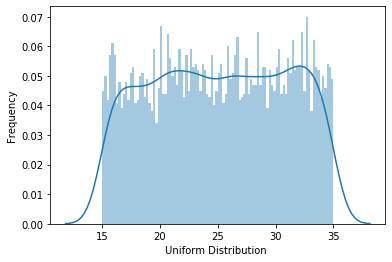

In [25]:
import seaborn as sns

# Make a histogram with Seaborn distplot
ax = sns.distplot(data, bins=100, kde=True)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

In [26]:
import numpy as np
from scipy import stats

# Estimate the parameters of the distribution and print them out
print("The mean is {:.2f}".format(np.mean(data)))
print("The median is {:.2f}".format(np.median(data)))
print("The standard deviation is {:.2f}".format(np.std(data)))
print("The 0-th moment (area under curve) is {:.2f}".format(stats.moment(data, moment=0)))
print("The 2-nd moment (variance) is {:.2f}".format(stats.moment(data, moment=2)))

The mean is 25.14
The median is 25.19
The standard deviation is 5.77
The 0-th moment (area under curve) is 1.00
The 2-nd moment (variance) is 33.26


### Gaussian Distribution

The Gaussian (or Normal) distribution is one of the most important in science as most measurements, variables values, or probabilities in a dataset or problem will be distributed in the shape of this curve. The *Central Limit Theorem* states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a normal distribution.

The equation for a normalised Gaussian distribution is

$$f(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp \left [ {-\frac{(x - \mu)^2}{2 \sigma^2}} \right]$$

where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution, respectively, that define the shape of the curve. We can sample some data from the distribution and visualise it as before:

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

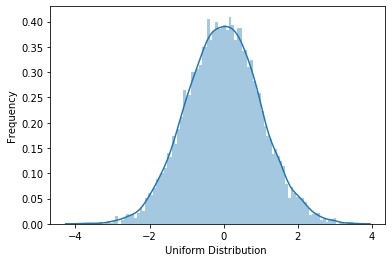

In [27]:
from scipy.stats import norm

# Generate the data
data = norm.rvs(size=10000,loc=0,scale=1)

# Make a histogram with Seaborn distplot
ax = sns.distplot(data, bins=100, kde=True)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

and again we can estimate the key parameters from the sampled data:

In [28]:
# Estimate the parameters of the distribution
print("The mean is {:.2f}".format(np.mean(data)))
print("The standard deviation is {:.2f}".format(np.std(data)))
print("The 0-th moment (area under curve) is {:.2f}".format(stats.moment(data, moment=0)))

The mean is -0.01
The standard deviation is 0.99
The 0-th moment (area under curve) is 1.00


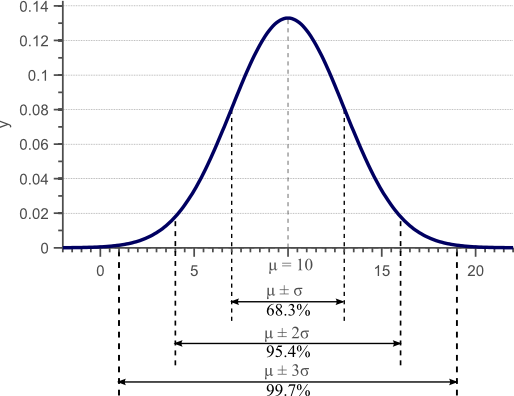

In [29]:
# Display an image from the drive
from IPython.display import Image
Image(filename='Images/gaussiandensity.png')

In science, we quote experimental results as $\sigma$ confidence levels. For example, the if the distribution above described the background *noise* of an astronomical observation, then a result of '17' would sit at the $2\sigma$ confidence level. That is, 95.4% of all random events (or pixels values in an image) would return values closer to the mean.

## <font color=red>NEW:</font> Estimating Parameters from Skewed Distributions

Distributions of real data, or even simulations, are often skewed from the ideal. However, it is still useful to estimate and describe them in terms of $\sigma$-limits based on confidence levels. 

First let's generate some data by combining a few Gaussian functions into a skewed distribution. This could be the output of a measurement, the values of pixels in an image or the result of a calculation. Our job is to quote a value and uncertainty given the distribution.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'X Variable')]

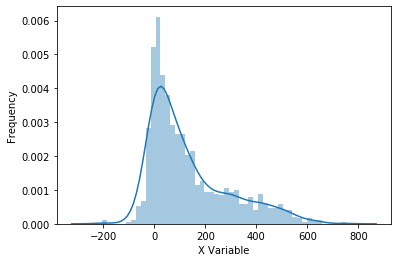

In [30]:
# Generate a skewed distribution using an ensemble of Gaussians
data = np.concatenate((norm.rvs(size=5000,loc=0,scale=15),
                       norm.rvs(size=8000,loc=30,scale=45),
                       norm.rvs(size=7000,loc=100,scale=65),
                       norm.rvs(size=10000,loc=300,scale=150)))

# Randomly sample 1,000 elements from this array
data = np.random.choice(data, 1000)

# Make a histogram with Seaborn distplot
ax = sns.distplot(data, bins=50, kde=True)
ax.set(xlabel='X Variable', ylabel='Frequency')

You can see that the data is noisy and is skewed to positive values with a long tail. We can calculate the values for mean and variance as if it were a Gaussian:

The mean is 132.35
The standard deviation is 156.30


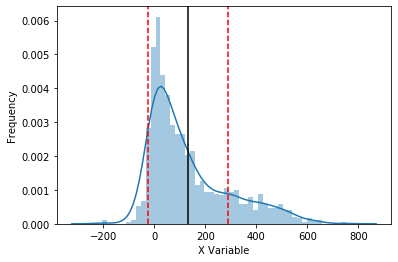

In [31]:
# Calculate the mean and standard deviation
mean = np.mean(data)
sigma = np.std(data)
print("The mean is {:.2f}".format(mean))
print("The standard deviation is {:.2f}".format(np.std(data)))

# Plot them on the histogram
ax = sns.distplot(data, bins=50, kde=True)
ax.set(xlabel='X Variable', ylabel='Frequency')
ax.axvline(mean, color="k")
ax.axvline(mean-sigma, color="r", linestyle="--")
ax.axvline(mean+sigma, color="r", linestyle="--")

However, the mean and $\pm1\sigma$ values these do not correspond the 68.3% confidence limits expected:

In [32]:
# Make mask: True where data < mean, False elsewhere 
msk = np.where(data < mean, True, False)
print("{:.1f}% of the data is less than the mean.".format(msk.sum()*100/len(data)))
print("{:.1f}% of the data is less than the mean.".format((~msk).sum()*100/len(data)))

# Note: True is treated as 1 and False as zero by sum()
# Also, the '~' is treated as 'not' for boolean values.

# Make mask: True where data < (mean - sigma), False elsewhere 
msk = np.where(data < mean - sigma, True, False)
print("{:.1f}% of the data is less than the lower 1-sigma limit."
      .format(msk.sum()*100/len(data)))

# Make mask: True where data > (mean + sigma), False elsewhere 
msk = np.where(data > mean + sigma, True, False)
print("{:.1f}% of the data is greater than the upper 1-sigma limit."
      .format(msk.sum()*100/len(data)))


64.0% of the data is less than the mean.
36.0% of the data is less than the mean.
5.1% of the data is less than the lower 1-sigma limit.
17.7% of the data is greater than the upper 1-sigma limit.


For a Normal distribution we would expect $(100 - 68.3)~/~2 = 15.85\%$ of the data to lie beyond the $1\sigma$ confidence limits. This means we must use a different method to estimate where our limits lie and adopt different upper and lower limits. The natural way to do this is to operate on the [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) (EDF), which plots the fraction of the data under a value, as a function of all values in the data range. 

On the EDF plot, $x$ values which interset the $y = 0.5$, $y = 0.1585$ and $y = 0.8415$ lines correspond to the mean, $-1\sigma$ and $+1\sigma$ confidence limits, respectively. Let's plot the EDF of our skewed distribution versus the cumulative distribution function for a Normal distribution.

In [33]:
from scipy.stats import norm

# Define a function to return a Normal CDF between 3-sigma limits.
def norm_cdf(mean=0.0, std=1.0, N=50):
    """Calculate the CDF of a normal distribution"""

    x = np.linspace(mean-3.0*std, mean+3.0*std, N)
    y = norm.cdf(x, loc=mean, scale=std)

    return x, y

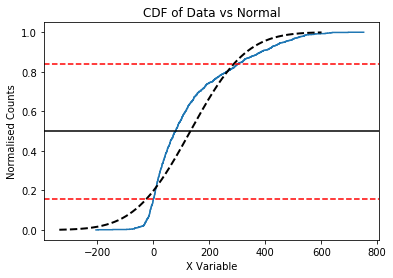

In [34]:
import matplotlib.pyplot as plt

# Calculate the empirical cumulative distribution function
nData = len(data)
yEDF = np.array(range(nData))/float(nData) + 1/(2 * nData)
indxSrt = data.argsort()      # Sorted indices of the data
xEDF = data[indxSrt]          # Sorted version of the data

# Use matplotlib to plot the EDF and Normal CDF
ax = plt.subplot()
ax.step(xEDF, yEDF, where="mid")
xCDF, yCDF = norm_cdf(mean=data.mean(), std=data.std(), N=1000)
ax.plot(xCDF, yCDF, color='k', linewidth=2, linestyle="--")
ax.set_title(r'CDF of Data vs Normal')
ax.set_xlabel("X Variable")
ax.set_ylabel(r'Normalised Counts')

# The confidence limits occur at $y = [0.1585, 0.5, 0.8415]
ax.axhline(0.1585, color="r", linestyle="--")
ax.axhline(0.5, color="k")
ax.axhline(0.8415, color="r", linestyle="--")

Rather than reading off the plot, what is the best way to calculate the x-values of these limits? 

Thankfully, Numpy provides some convenience functions to help:

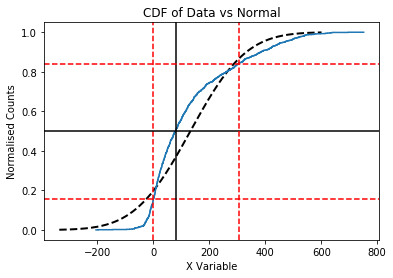

In [35]:
# Use the percentiles function to calculate the crossing points
neg1sig, mean1, pos1sig = np.percentile(data, [15.72, 50, 84.27])

# Now plot on the EDF/CDF figure again
ax = plt.subplot()
ax.step(xEDF, yEDF, where="mid")
xCDF, yCDF = norm_cdf(mean=data.mean(), std=data.std(), N=1000)
ax.plot(xCDF, yCDF, color='k', linewidth=2, linestyle="--", zorder=1)
ax.set_title(r'CDF of Data vs Normal')
ax.set_xlabel("X Variable")
ax.set_ylabel(r'Normalised Counts')

# The confidence limits occur at $y = [0.1585, 0.5, 0.8415]
ax.axhline(0.1585, color="r", linestyle="--")
ax.axvline(neg1sig, color="r", linestyle="--")
ax.axhline(0.5, color="k")
ax.axvline(mean1, color="k")
ax.axhline(0.8415, color="r", linestyle="--")
ax.axvline(pos1sig, color="r", linestyle="--")

The quoted uncertinties are the differences between the mean and the $\pm 1\sigma$ limits:

In [36]:
# Calculate the uncertainties:
errLow = mean1 - neg1sig
errHigh = pos1sig - mean1
print(r"The best value for X is {:.1f} +{:.1f} / -{:.1f}".format(mean1, errHigh, errLow))

The best value for X is 79.4 +226.7 / -79.4


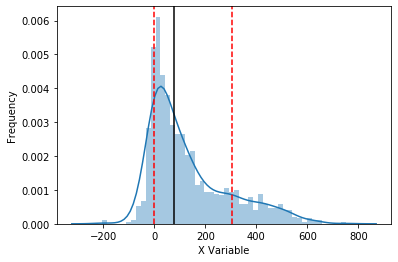

In [37]:
# Plot them on the histogram
ax = sns.distplot(data, bins=50, kde=True)
ax.set(xlabel='X Variable', ylabel='Frequency')
ax.axvline(mean1, color="k")
ax.axvline(neg1sig, color="r", linestyle="--")
ax.axvline(pos1sig, color="r", linestyle="--")